# Task 6: Model Tuning

● Use parameters like:

○ max_depth

○ min_samples_split

● Show how performance changes.

● Plot training vs testing accuracy to visualize overfitting.

In [1]:
url = "https://raw.githubusercontent.com/ShubhamSinghal12/GLA_pythonML2025/refs/heads/main/LogisticRegression/Titanic.csv"

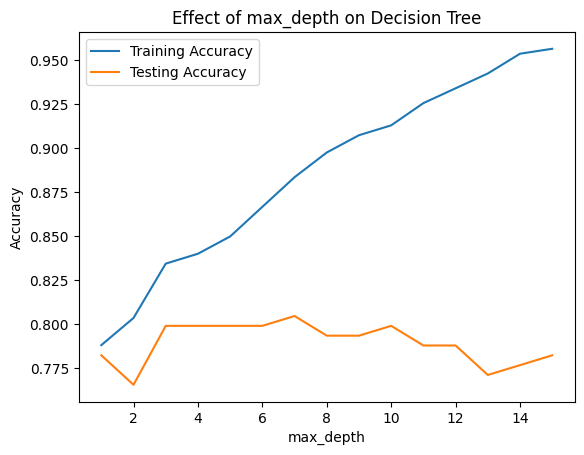

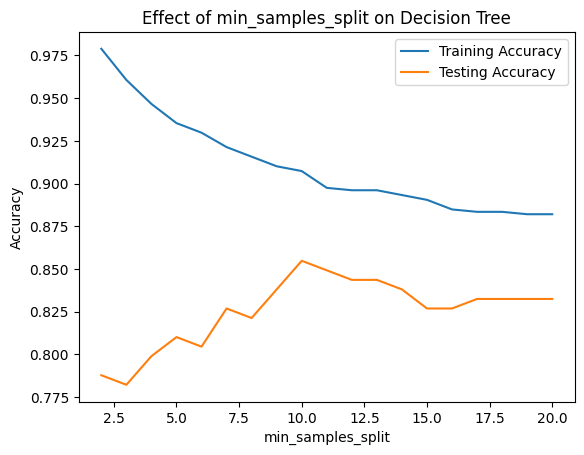

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Titanic dataset

url = "https://raw.githubusercontent.com/ShubhamSinghal12/GLA_pythonML2025/refs/heads/main/LogisticRegression/Titanic.csv"
df = pd.read_csv(url)

# Select relevant features

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Split dataset

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tune max_depth and plot accuracies

max_depths = range(1, 16)
train_acc = []
test_acc = []

for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(max_depths, train_acc, label='Training Accuracy')
plt.plot(max_depths, test_acc, label='Testing Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree')
plt.legend()
plt.show()

# Tune min_samples_split and plot accuracies

splits = range(2, 21)
train_acc_split = []
test_acc_split = []

for s in splits:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    clf.fit(X_train, y_train)
    train_acc_split.append(clf.score(X_train, y_train))
    test_acc_split.append(clf.score(X_test, y_test))

plt.plot(splits, train_acc_split, label='Training Accuracy')
plt.plot(splits, test_acc_split, label='Testing Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Decision Tree')
plt.legend()
plt.show()